In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

sns.set(style = 'whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [37]:
HD = pd.read_csv('./heart.csv')
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
#age = 나이
#sex = 성(남1 여0)
#cp = 가슴통증유형(0~4)
#trestbps = 안정혈압
#chol = 혈청 콜레스트롤
#fbs = 공복혈당
#rectecg = 안정 심전도(0~2)
#thalach = 최대 심박동수
#exang = 협심증 유발 운동(Yes1 No0)
#oldpeak
#slope = 최대 운동 ST의 기울기
#ca = 형광 투시된 주요 혈관의 수(0~3)
#thal = (보통3 해결된결함6 해결가능결함7)
#target = 심장병진단(T1 F0)

In [39]:
HD.shape

(303, 14)

In [40]:
HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 0, '')

C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\ba

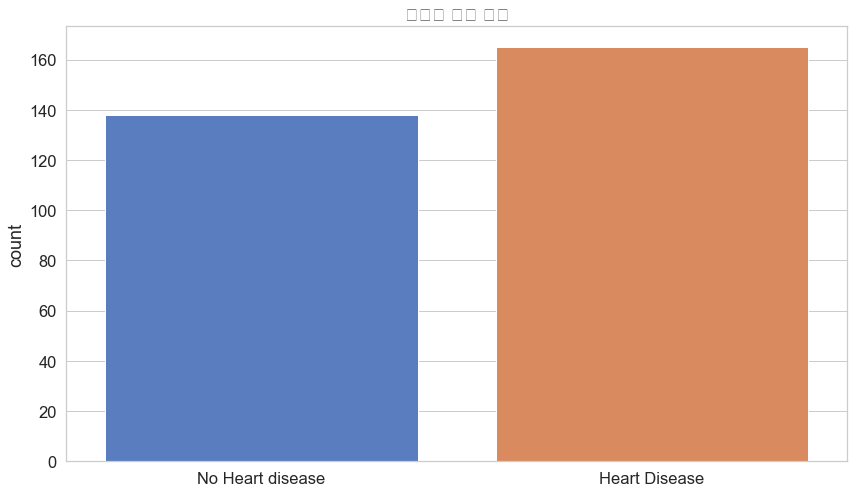

In [41]:
# 환자데이터를 시각화해서 이해해보자
f = sns.countplot(x='target', data = HD)
f.set_title("심장병 유무 구별")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Text(0.5, 0, '')

C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thakd\anaconda3\envs\test\lib\site-packages\matplotlib\backends\ba

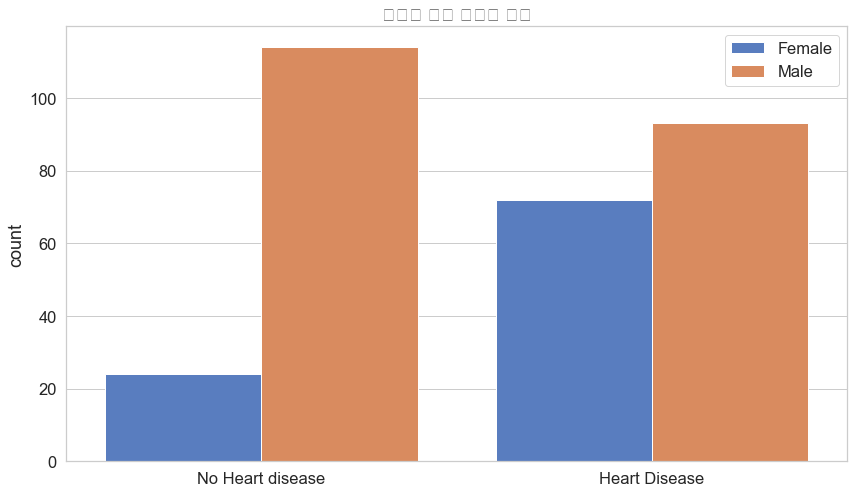

In [42]:
# 환자데이터를 시각화해서 이해해보자
f = sns.countplot(x='target', data = HD, hue = 'sex')
f.set_title("성별로 보는 심장병 유무")
plt.legend(['Female','Male'])
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

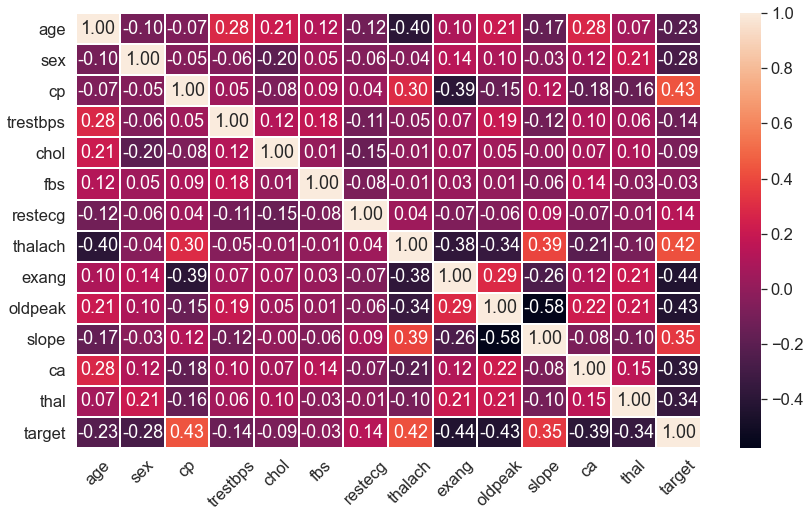

In [43]:
#변수 사이에서의 상관관계 정도를 Heatmap으로 구현
# +1에 가까울수록 Postive // -1에 가까울수록 Negative
heat_map = sns.heatmap(HD.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

In [44]:
feature_columns = []
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'] :
    feature_columns.append(tf.feature_column.numeric_column(header))

age = tf.feature_column.numeric_column("age")
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

HD["thal"] = HD["thal"].apply(str)
thal = tf.feature_column.categorical_column_with_vocabulary_list('thal', ['3', '6', '7'])
thal_one_hot = tf.feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

HD["sex"] = HD["sex"].apply(str)
sex = tf.feature_column.categorical_column_with_vocabulary_list('sex', ['0','1'])
sex_one_hot = tf.feature_column.indicator_column(sex)
feature_columns.append(sex_one_hot)

HD["cp"] = HD["cp"].apply(str)
cp = tf.feature_column.categorical_column_with_vocabulary_list('cp', ['0','1'])
cp_one_hot = tf.feature_column.indicator_column(cp)
feature_columns.append(cp_one_hot)

HD["slope"] = HD["slope"].apply(str)
slope = tf.feature_column.categorical_column_with_vocabulary_list('slope', ['0','1','2'])
slope_one_hot = tf.feature_column.indicator_column(slope)
feature_columns.append(slope_one_hot)

thal_embedding = tf.feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

age_thal_crossed = tf.feature_column.crossed_column([age_buckets, thal], hash_bucket_size = 1000)
age_thal_crossed = tf.feature_column.indicator_column(age_thal_crossed)
feature_columns.append(age_thal_crossed)

cp_slope_crossed = tf.feature_column.crossed_column([cp, slope], hash_bucket_size = 1000)
cp_slope_crossed = tf.feature_column.indicator_column(cp_slope_crossed)
feature_columns.append(cp_slope_crossed)

In [45]:
def create_dataset(dataframe, batch_size=32) :
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    return tf.data.Dataset.from_tensor_slices((dict(dataframe),labels)) \
            .shuffle(buffer_size = len(dataframe)) \
            .batch(batch_size)

In [113]:
X = HD.iloc[:, :-1].values
y = HD.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [114]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)# get instance of model
model.fit(x_train, y_train) # Train/Fit model 

y_pred = model.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred)) # output accuracy


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21  9]
 [ 3 28]]


0.8032786885245902

<AxesSubplot:>

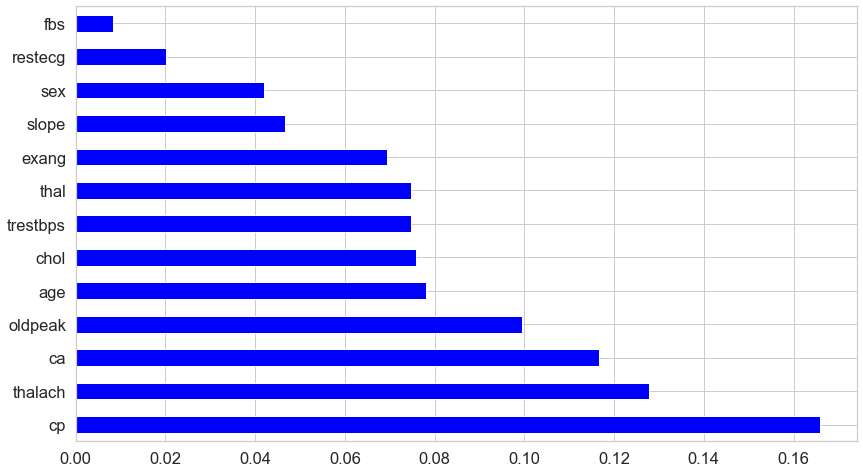

In [117]:
index= HD.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')